`Scikit-Learn` provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the MNIST dataset from OpenML.org:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml # download real-life datasets

np.random.seed(42)

mnist = fetch_openml('mnist_784', as_frame=False) # as_frame=False to get a numpy array

In [6]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
print(f'mnist data: {mnist.data}\nmnist target: {mnist.target}\nShape of mnist data: {mnist.data.shape}')

mnist data: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
mnist target: ['5' '0' '4' ... '4' '5' '6']
Shape of mnist data: (70000, 784)


In [8]:
X, y = mnist.data, mnist.target
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (70000, 784)
y shape: (70000,)


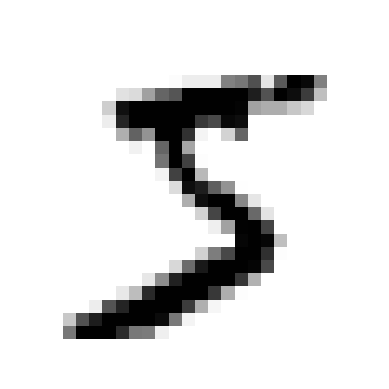

In [10]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

Next, we randomly draw 10,000 samples and perform K-means cluster on this subset.

In [3]:
# K-means clustering
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

K = 10          # number of clusters 
N = 10000       # number of samples 

X = mnist.data[np.random.choice(mnist.data.shape[0], N)]
kmeans = KMeans(n_clusters=K).fit(X)
pred_label = kmeans.predict(X)

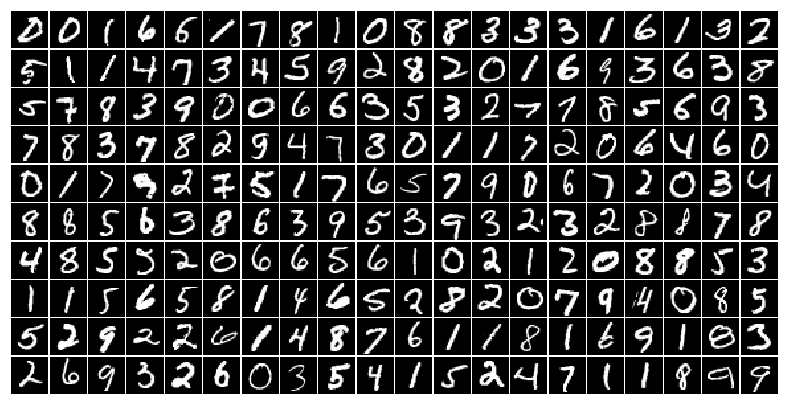

In [4]:
from display_network import * 

plt.figure(figsize=(10, 5))
plt.axis('off')
A = display_network(X.T, 10, 20) # visualize 10*20 images
# The `display_network` function expects the input matrix to have each column representing an image.
plt.imshow(A, interpolation='nearest') # `interpolation='nearest'` means do not blur the boundaries
plt.gray()

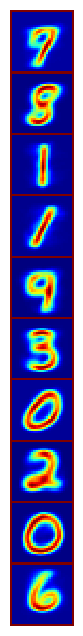

In [5]:
# Display the cluster centers
plt.figure(figsize=(5, 8))
plt.axis('off')
A = display_network(kmeans.cluster_centers_.T, 10, 1)
plt.imshow(A, interpolation='nearest',cmap=plt.cm.jet) # `cmap=plt.cm.jet` means use the jet colormap

In [6]:
# Display the nearest points to the centroids
N0 = 10
K = 10
X1 = np.zeros((N0 * K, 784))
X2 = np.zeros((N0 * K, 784))

for k in range(K):
    Xk = X[pred_label==k, :]
    
    # N0 nearest points
    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(n_neighbors=N0).fit(Xk) # get N0 nearest neighbors 
    dist, nearest_id  = neigh.kneighbors(center_k, N0) # get the distance and the index of the nearest neighbors

    X1[N0*k:N0*k + N0, :] = Xk[nearest_id, :]
    X2[N0*k:N0*k + N0, :] = Xk[:N0, :]

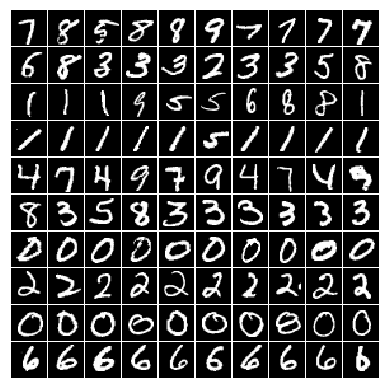

In [7]:
# random points in cluster 
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

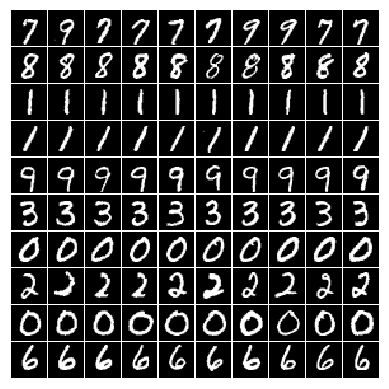

In [8]:
# nearest points 
plt.axis('off')
A = display_network(X1.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest')
plt.show

***Applying K-means clustering in image segmentation and compression:***

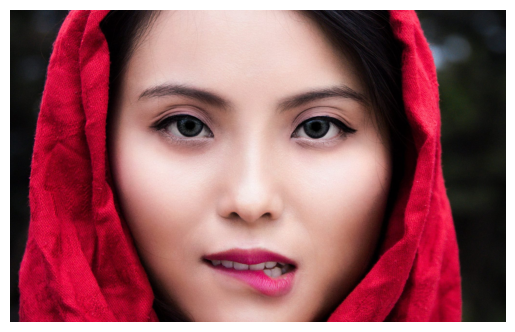

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # read image from file
from sklearn.cluster import KMeans

img = mpimg.imread('image.jpg')
plt.axis('off')
plt.imshow(img)

In [15]:
img

array([[[10, 12,  9],
        [11, 13, 10],
        [12, 14, 11],
        ...,
        [14, 14, 14],
        [15, 15, 15],
        [12, 12, 12]],

       [[10, 12,  9],
        [11, 13, 10],
        [12, 14, 11],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [12, 12, 12]],

       [[11, 13, 10],
        [11, 13, 10],
        [12, 14, 11],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [12, 12, 12]],

       ...,

       [[24, 18, 20],
        [23, 17, 19],
        [22, 18, 19],
        ...,
        [23, 29, 19],
        [24, 30, 18],
        [25, 31, 19]],

       [[24, 18, 20],
        [23, 17, 19],
        [22, 18, 19],
        ...,
        [23, 29, 19],
        [24, 30, 18],
        [25, 31, 19]],

       [[23, 17, 19],
        [25, 19, 21],
        [25, 21, 22],
        ...,
        [23, 29, 19],
        [22, 28, 16],
        [21, 27, 15]]], dtype=uint8)

In [14]:
img.shape # (height, width, color)

(1289, 2048, 3)

The image is converted into a matrix with a row of 1 pixel corresponding to 3 color values.

In [17]:
X = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))
X

array([[10, 12,  9],
       [11, 13, 10],
       [12, 14, 11],
       ...,
       [23, 29, 19],
       [22, 28, 16],
       [21, 27, 15]], dtype=uint8)

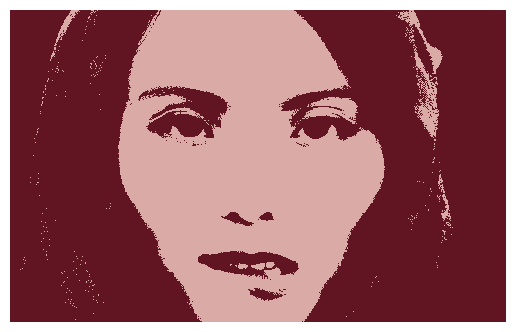

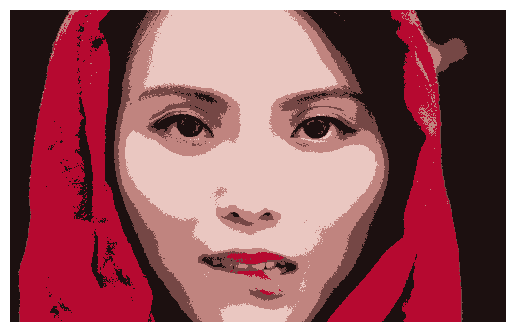

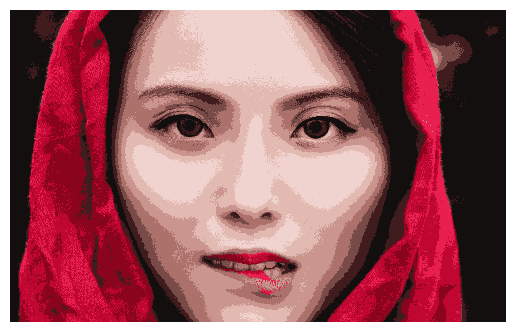

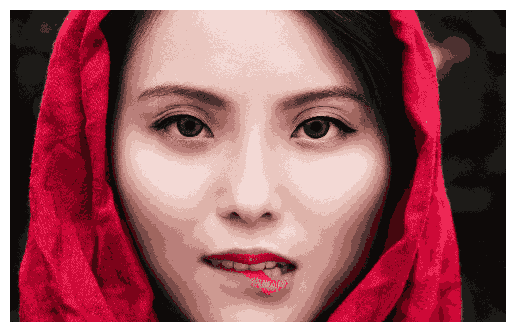

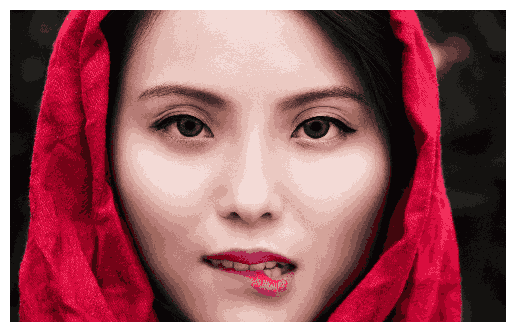

In [20]:
for K in [2, 5, 10, 15, 20]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

    img4 = np.zeros_like(X)
    # replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    
    # reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()

___
## **References:**

$[1].$ *Vũ Hữu Tiệp. Machine Learning cơ bản, Chapter 10, 2018.*